# Доп. задачи и анализа данных
## Задание 3.1

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds20_bot`.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

**Баллы за задание:**

* Задача 1 -  5 баллов
* Задача 2 -  5 баллов
* Задача 3 -  10 баллов

In [1]:
options(repr.plot.width = 14, repr.plot.height = 8)

### Задача 1.

Пусть $X_1, ..., X_n$ — выборка из гамма-распределения $\Gamma(\theta, 5)$. Постройте равномерно наиболее мощный критерий для проверки гипотез $\mathsf{H}_0\colon \theta = 1\ vs. \mathsf{H}_1\colon \theta<1$. 

a). Сгенерируйте выборку $X_1, ..., X_{50}$ из гамма-распределения $\Gamma(\theta, 5)$ для случаев $\theta=1$,  $\theta=0.3$ и $\theta=5$. В каждом случае посчитайте p-value. В каких случаях основная гипотеза отвергается?

b). На одном графике постройте кривые мощности для разных размеров выборки (см. лекции прошлого семестра).

**Решение.** Построим РМНК. Воспользуемся теоремой о монотонном отношении правдоподобия. Для начала найдём $$p_{\theta}(x) = \frac{\theta^5 x^4}{Г(5)}e^{-\theta x} \Rightarrow L_X(\theta) = \frac{\theta^{5n}}{Г^n(5)}\prod_{i=1}^n x_i^4 \cdot e^{-\sum_{i=1}^n \theta x_i} \Rightarrow \frac{L_X(\theta_1)}{L_X(\theta_2)} = \bigg(\frac{\theta_1}{\theta_2}\bigg)^{5n} e^{\sum_{i=1}^n (\theta_2 - \theta_1)x_i}.$$

Отношение функций правдоподобия при $\theta_1 > \theta_2$ есть монотонно убывающая функция по $T(X) = \sum_{i=1}^n X_i$, следовательно, $S = \{T(X) > c_{\alpha}\}$ --- РНМК, где $c_{\alpha}$ находится из условия $P_{\theta_0}(T(X) > c_{\alpha}) = \alpha.$

In [135]:
# Для \alpha = 0.95 и \theta_0 = 1
n = 50

calc_criterion <- function(theta) {
    # учтём, что \beta <=> shape, \alpha <=> 1 / scale
    sample = rgamma(n = n, scale = 1/theta, shape = 5)
    t = sum(sample)
    return(1 - pgamma(q = t, scale = 1/1, shape = 5*n))
}

print('Отвергаем для theta=1?')
print(0.05 >= calc_criterion(1))
print('Отвергаем для theta=0.3?')
print(0.05 >= calc_criterion(0.3))
print('Отвергаем для theta=5?')
print(0.05 >= calc_criterion(5))

[1] "Отвергаем для theta=1?"
[1] FALSE
[1] "Отвергаем для theta=0.3?"
[1] TRUE
[1] "Отвергаем для theta=5?"
[1] FALSE


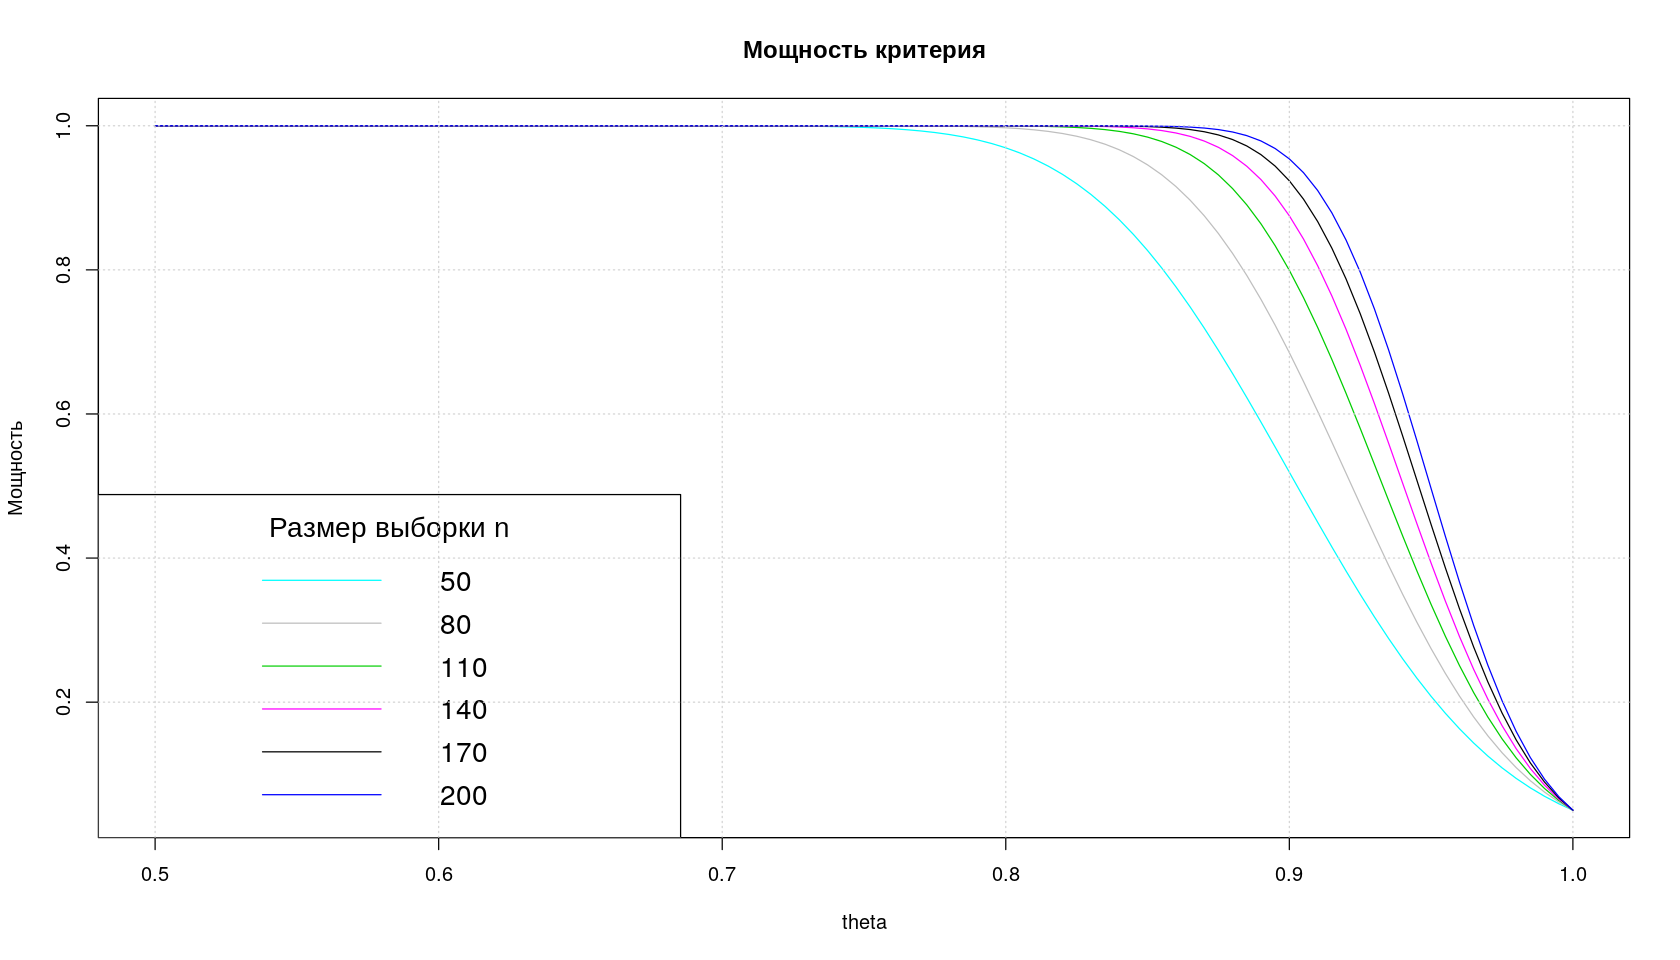

In [44]:
theta = seq(0.5, 1, 0.005)

for (n in seq(50, 200, 30)) {
    c_alpha = qgamma(p = 0.95, scale = 1, shape = 5*n)
    beta_S = 1 - pgamma(c_alpha, scale = 1/theta, shape = 5*n)
    if (n == 50) {
        plot(x = theta, y = beta_S, type="l", col=n / 10,
             main = "Мощность критерия", xlab = "theta", ylab = "Мощность")
    } else {
        lines(x = theta, y = beta_S, col=n / 10)
    }
}

legend("bottomleft", legend = seq(50, 200, 30), col = seq(50, 200, 30) / 10,
       lty=1, cex = 1.4, title = "Размер выборки n")
grid()

### Задача 2.

Данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений:

In [45]:
speed <- scan("/home/topcoder2k/ds-intro/data/raw/MatStat/speed.txt")
print(speed)

  [1] 299850 299740 299900 300070 299930 299850 299950 299980 299980 299880
 [11] 300000 299980 299930 299650 299760 299810 300000 300000 299960 299960
 [21] 299960 299940 299960 299940 299880 299800 299850 299880 299900 299840
 [31] 299830 299790 299810 299880 299880 299830 299800 299790 299760 299800
 [41] 299880 299880 299880 299860 299720 299720 299620 299860 299970 299950
 [51] 299880 299910 299850 299870 299840 299840 299850 299840 299840 299840
 [61] 299890 299810 299810 299820 299800 299770 299760 299740 299750 299760
 [71] 299910 299920 299890 299860 299880 299720 299840 299850 299850 299780
 [81] 299890 299840 299780 299810 299760 299810 299790 299810 299820 299850
 [91] 299870 299870 299810 299740 299810 299940 299950 299800 299810 299870


Требуется исследовать данные на нормальность. При построении графиков подписывайте оси и сам график.

Постройте гистограмму по данным

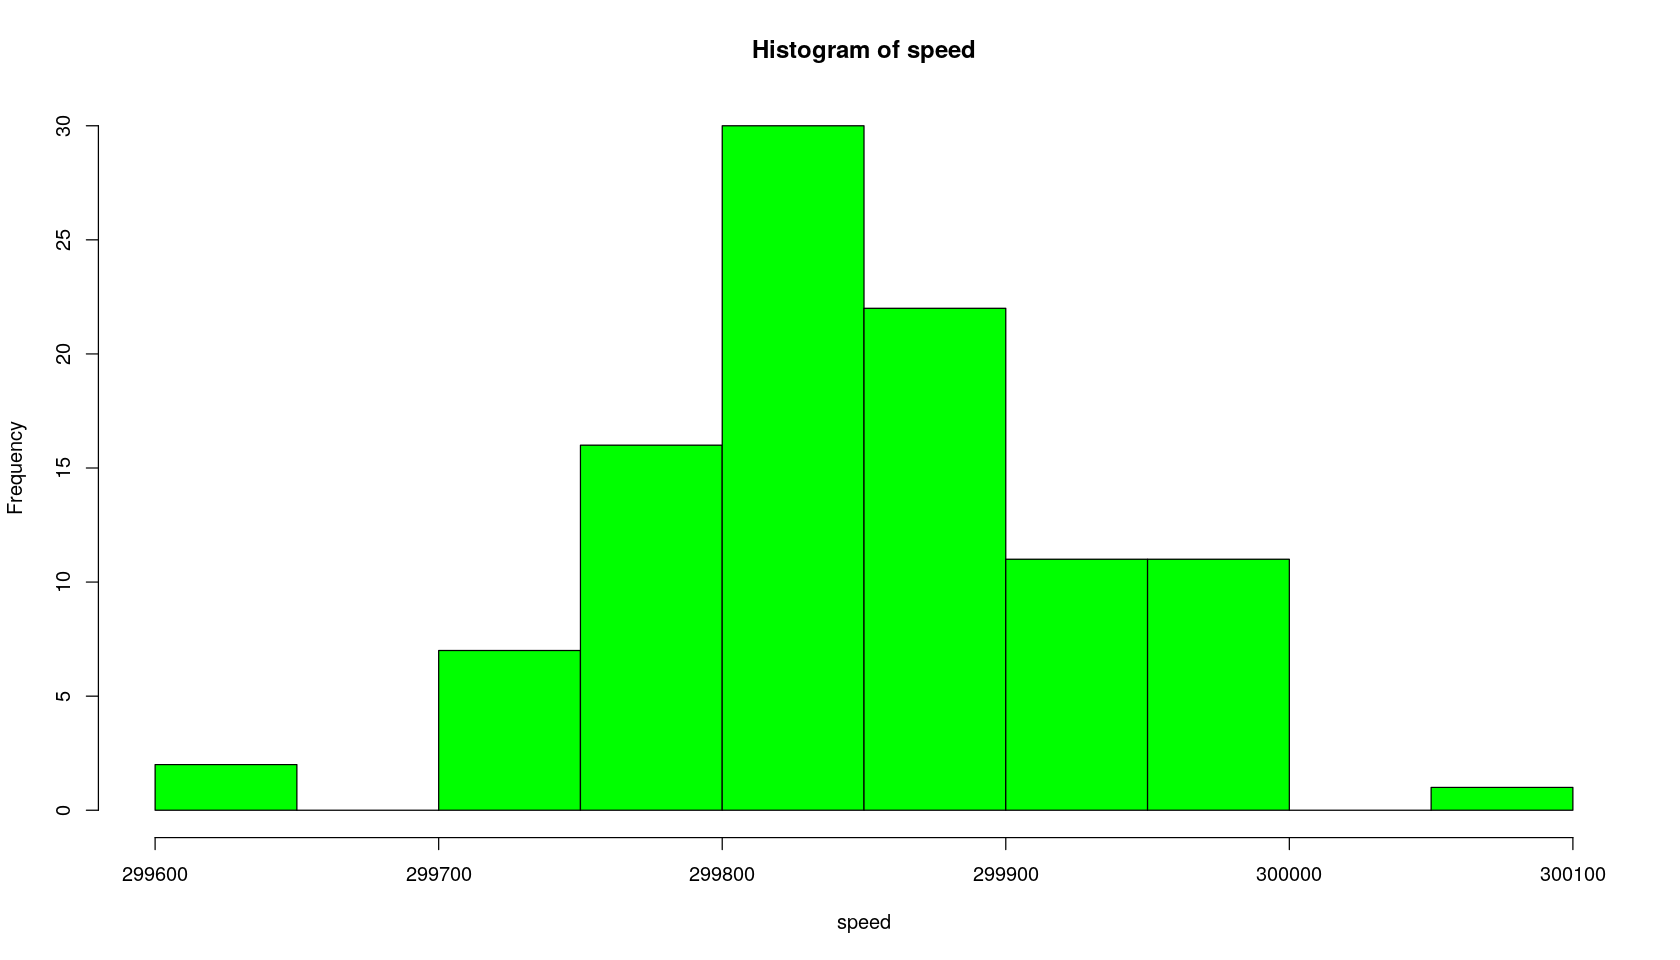

In [46]:
hist(speed, col='green')

Постройте график ядерной оценки плотности, на который нанесите также график плотности нормального распределения, параметры которого соответствуют оценке максимального правдоподобия по данным.

*Замечание.* Функция `plot` создает новую фигуру и рисует линию/точки. Функция `lines` рисует линию/точки на уже *существующей* фигуре. Тип линии или точек определяется параметром `type `.

In [47]:
# Применим ОМП
a = mean(speed)
sigma = sd(speed)

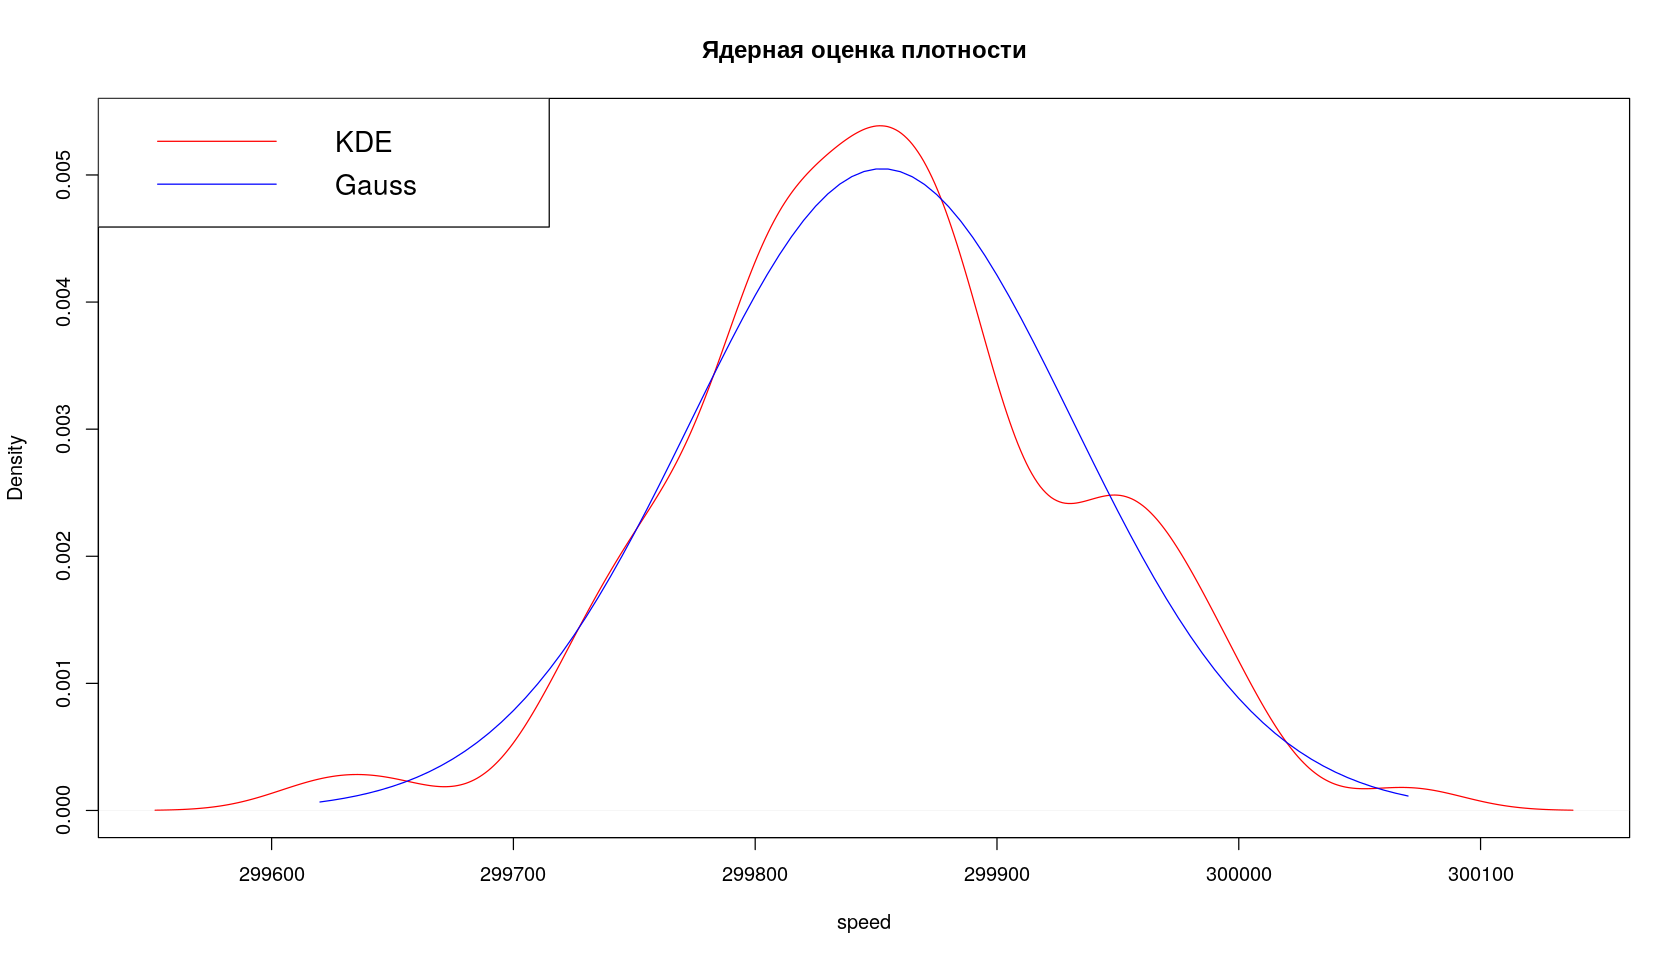

In [52]:
plot(density(x = speed, kernel = "gaussian"),
     main = "Ядерная оценка плотности",
     col = "red",
     xlab = "speed"
    )

X = seq(min(speed), max(speed), 5)
lines(x = X, dnorm(x = X, mean = a, sd = sigma),
        type = "l", col = "blue")
legend("topleft", legend = c("KDE", "Gauss"), col = c("red", "blue"), lty=1,
       cex = 1.4)

Постройте график эмпирической функции распределения, на который нанесите также график функции распределения нормального распределения, параметры которого соответствуют оценке максимального правдоподобия по данным. Добавьте на график сетку.

*Замечание.* При отрисовке ЭФР установите параметры:
* `verticals = TRUE` — рисовать вертикальные линии;
* `pch = NA` — не рисовать точки.

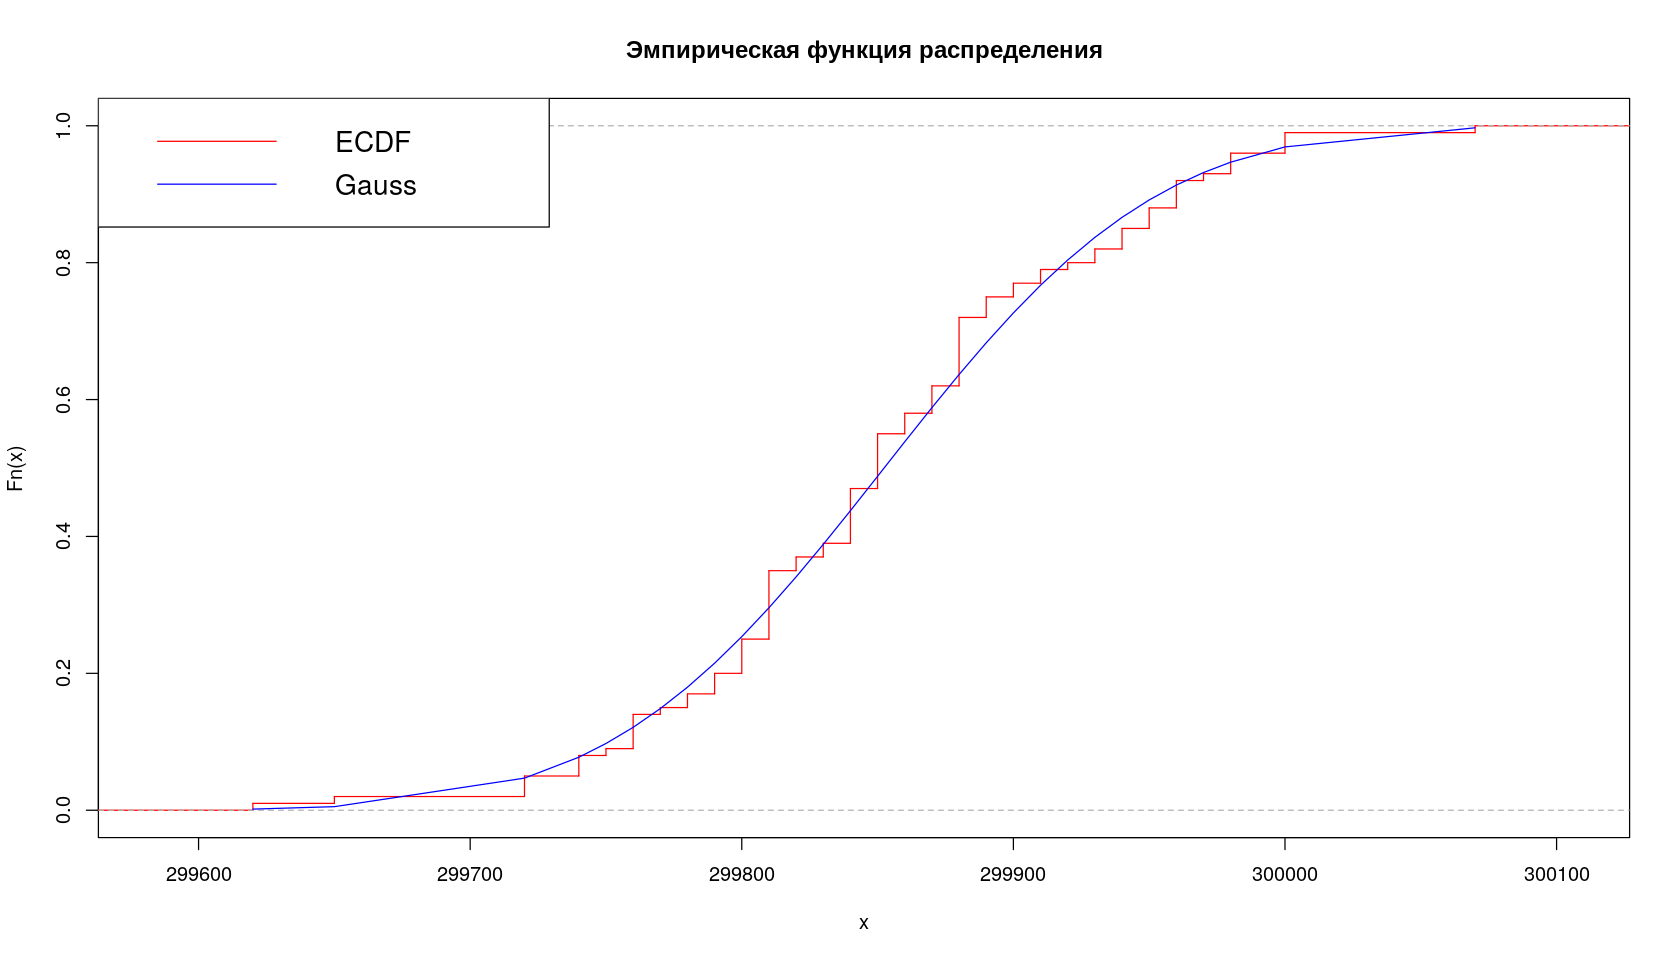

In [51]:
ecdf_ = ecdf(x = speed)
plot(ecdf_, verticals = TRUE, pch = NA,
     main = "Эмпирическая функция распределения", col = "red")
lines(x = sort(speed), pnorm(q = sort(speed), mean = a, sd = sigma),
        type = "l", col = "blue")
legend("topleft", legend = c("ECDF", "Gauss"), col = c("red", "blue"), lty=1,
       cex = 1.4)

Простройте по данным Q-Q plot

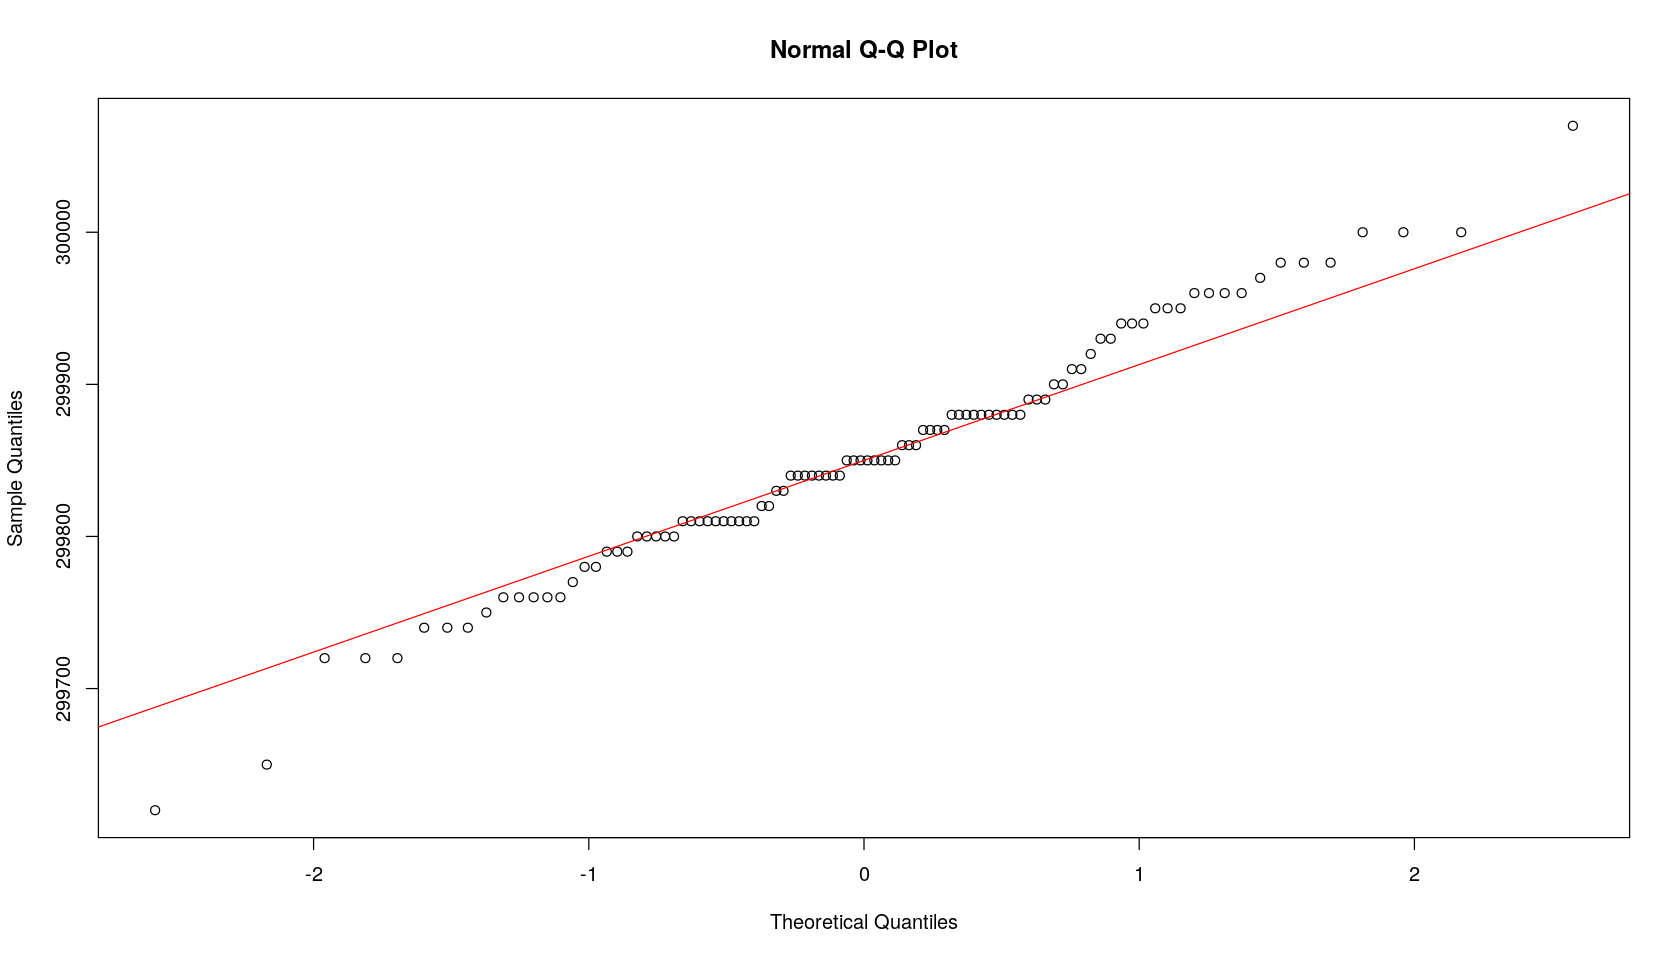

In [53]:
qqnorm(speed)
qqline(speed, col = 2)

Примените к данным критерии Лиллиефорса, Андерсона-Дарлинга, Крамера-фон Мизеса, Жарка-Бера и Шапиро-Уилка

In [19]:
# install.packages('nortest')
library('nortest')`
# install.packages('normtest')
library('normtest')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Сохраните p-value каждого критерия в вектор. Для этого у результата нужно взять поле `p.value`. Не забудьте, что в R символ `.` (точка) является частью имени переменной.

In [82]:
res = lillie.test(speed)
pvals = c(res$p)
res = ad.test(speed)
pvals = c(pvals, res$p)
res = cvm.test(speed)
pvals = c(pvals, res$p)
res = jb.norm.test(speed)
pvals = c(pvals, res$p)
pvals

[1] 0.08289043 0.25495663 0.22273420 0.86750000

Примените к ним процедуру множественной проверки гипотез по методу Холма

In [87]:
p.adjust(p = pvals, method = "holm")

[1] 0.3315617 0.6682026 0.6682026 0.8675000

Сделайте выводы:

1) В KDE смущает наличие провала справа. Это может говорить о присутствии в наборе двух типов данных с разными распределениями. Также на QQ-plot видны отклонения от прямой слева и справа, что тоже смущает.

2) Но ни один из критериев не отвергает гипотезу о нормальности распределения, поэтому в целом можно согласиться с нормальной моделью.


### Задача 3.

Загрузите набор маркетинговых данных о влиянии рекламных СМИ (youtube, facebook и газеты) на продажи. Значения признаков представляют рекламный бюджет, целевая метка (sales) указана в некоторых условных единицах товара. Датасет будет записан в переменную `marketing`.

In [2]:
load('/home/topcoder2k/ds-intro/data/raw/MatStat/marketing.rda')
head(marketing)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


1. Разбейте случайно данные на обучающую и тестовую часть в соотношении 3:1.
2. Обучите линейную регрессию по всем признакам, используя обучающую часть данных, и напечатайте таблицу свойств полученной модели. Что по ней можно сказать? В чем практический смысл коэффициентов линейной регрессии.
3. Напечатайте матрицу ковариаций оценки вектора параметров в предположении 
гомоскедастичности.
4. Проведите отбор признаков, используя информационные критерии AIC и BIC.
5. Проведите отбор признаков, минимизируя ошибку на тестовой части данных по метрикам MSE, MAE, MAPE.
6. Рассмотрим оптимальную модель по метрике MAPE. Зафиксируйте некоторые значения параметров facebook и newspaper. Постройте график зависимости предсказания от параметра youtube. Нанесите на график предсказательный интервал.

In [3]:
# install.packages('caret', dependencies = TRUE)
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [4]:
partition = createDataPartition(y = marketing$sales, p = 0.75, list = FALSE)
train <- marketing[partition,]
test <- marketing[-partition,]
head(test)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
12,257.64,28.80,4.80,20.88
17,81.36,43.92,136.80,15.00
19,83.04,24.60,21.96,13.56
20,176.76,28.68,22.92,17.52
21,262.08,33.24,64.08,21.60
23,15.84,19.08,59.52,6.72


In [5]:
model = lm(formula = sales ~ ., data = train)
summary(model)


Call:
lm(formula = sales ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5323  -1.0774   0.3614   1.4517   3.1988 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.266896   0.445486   7.333 1.39e-11 ***
youtube      0.046749   0.001649  28.345  < 2e-16 ***
facebook     0.193350   0.009989  19.356  < 2e-16 ***
newspaper   -0.004011   0.007095  -0.565    0.573    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.072 on 147 degrees of freedom
Multiple R-squared:  0.896,	Adjusted R-squared:  0.8939 
F-statistic: 422.3 on 3 and 147 DF,  p-value: < 2.2e-16


**Вывод.** Во-первых, мы отклоняем гипотезы о незначимости для ```youtube, facebook, (Intercept)```. Во-вторых, коэффициент детерминации близок к 1, и p-value F-статистики очень маленький, так что мы отклоняем гипотезу о незначимости инейной регрессии.

In [6]:
vcov(model)

,(Intercept),youtube,facebook,newspaper
(Intercept),0.1984581468,-4.460062e-04,-1.839333e-03,-1.068467e-03
youtube,-0.0004460062,2.720147e-06,-2.275381e-07,-7.168168e-07
facebook,-0.0018393326,-2.275381e-07,9.977850e-05,-2.450315e-05
newspaper,-0.0010684669,-7.168168e-07,-2.450315e-05,5.034111e-05


**Вывод.** Видим, что все корреляции признаков малы, так что мультиколлинеарности, скорее всего, нет.

In [7]:
library(bestglm)
bestglm(train, family = gaussian, IC = "BIC")

Loading required package: leaps



BIC
BICq equivalent for q in (0, 0.912512969938574)
Best Model:
              Estimate  Std. Error   t value     Pr(>|t|)
(Intercept) 3.18177294 0.418296805  7.606496 3.018487e-12
youtube     0.04669144 0.001642401 28.428775 7.780056e-62
facebook    0.19139829 0.009351356 20.467438 5.244889e-45

In [8]:
bestglm(train, family = gaussian, IC = "AIC")

AIC
BICq equivalent for q in (0, 0.912512969938574)
Best Model:
              Estimate  Std. Error   t value     Pr(>|t|)
(Intercept) 3.18177294 0.418296805  7.606496 3.018487e-12
youtube     0.04669144 0.001642401 28.428775 7.780056e-62
facebook    0.19139829 0.009351356 20.467438 5.244889e-45

**Вывод.** Оба метода отбрасывают ```newspapers```.

In [9]:
library(combinat)


Attaching package: ‘combinat’


The following object is masked from ‘package:utils’:

    combn




In [10]:
MAE <- function(test, prediction) {
    return(mean(abs(test - prediction)))
}
MSE <- function(test, prediction) {
    return(mean((test - prediction)^2))
}
MAPE <- function(test, prediction) {
    return(100 * mean(abs((test - prediction) / test)))
}

In [11]:
best_perm_mae = c(FALSE, FALSE, FALSE)
best_perm_mse = c(FALSE, FALSE, FALSE)
best_perm_mape = c(FALSE, FALSE, FALSE)

best_mae = 1 / 0
best_mse = 1 / 0
best_mape = 1 / 0

find_best_feats <- function(to_permute, is_print) {
    for (cur_perm in permn(to_permute)) {
        mask = c(cur_perm, FALSE) # чтобы исключить sales
        cur_features = colnames(marketing)[mask]
        cur_formula = "sales ~"
        if ('youtube' %in% cur_features) {
            cur_formula = paste(cur_formula, "youtube +")
        }
        if ('facebook' %in% cur_features) {
            cur_formula = paste(cur_formula, "facebook +")
        }
        if ('newspaper' %in% cur_features) {
            cur_formula = paste(cur_formula, "newspaper +")
        }
        cur_formula = gsub(" \\+$", "", x = cur_formula)
        # print(as.formula(cur_formula))

        cur_model = lm(formula = as.formula(cur_formula), data = train)

        predicted = predict(cur_model, test)
        cur_mae = MAE(test$sales, predicted)
        if (cur_mae < best_mae) {
            best_perm_mae <<- cur_perm
            best_mae <<- cur_mae
        }
        cur_mse = MSE(test$sales, predicted)
        if (cur_mse < best_mse) {
            best_perm_mse <<- cur_perm
            best_mse <<- cur_mse
        }
        cur_mape = MAPE(test$sales, predicted)
        if (cur_mape < best_mape) {
            best_perm_mape <<- cur_perm
            best_mape <<- cur_mape
        }
    }

    print_res <- function(best_subset, case) {
        mask = c(best_subset, FALSE) # чтобы исключить sales
        best_subset = colnames(marketing)[mask]
        print(case)
        print(best_subset)
    }
    if (is_print == TRUE) {
        print_res(best_perm_mae, "Минимизация MAE происходит при выборе: ")
        print_res(best_perm_mse, "Минимизация MSE происходит при выборе: ")
        print_res(best_perm_mape, "Минимизация MAPE происходит при выборе: ")
    }
}

find_best_feats(c(TRUE, FALSE, FALSE), FALSE)
print("При выборе одного признака минимальное значение MAPE: ")
print(best_mape)
find_best_feats(c(TRUE, TRUE, FALSE), FALSE)
print("При выборе двух признаков минимальное значение MAPE: ")
print(best_mape)
print("==================================================================")
find_best_feats(c(TRUE, TRUE, TRUE), TRUE)
print("При выборе всех признаков минимальное значение MAPE: ")
print(best_mape)

[1] "При выборе одного признака минимальное значение MAPE: "
[1] 15.588
[1] "При выборе двух признаков минимальное значение MAPE: "
[1] 10.73617
[1] "=================================================================="
[1] "Минимизация MAE происходит при выборе: "
[1] "youtube"   "facebook"  "newspaper"
[1] "Минимизация MSE происходит при выборе: "
[1] "youtube"  "facebook"
[1] "Минимизация MAPE происходит при выборе: "
[1] "youtube"   "facebook"  "newspaper"
[1] "При выборе всех признаков минимальное значение MAPE: "
[1] 10.62465


**Вывод.** Таким образом, на MAPE достигается минимум при всех трёх признаках. 

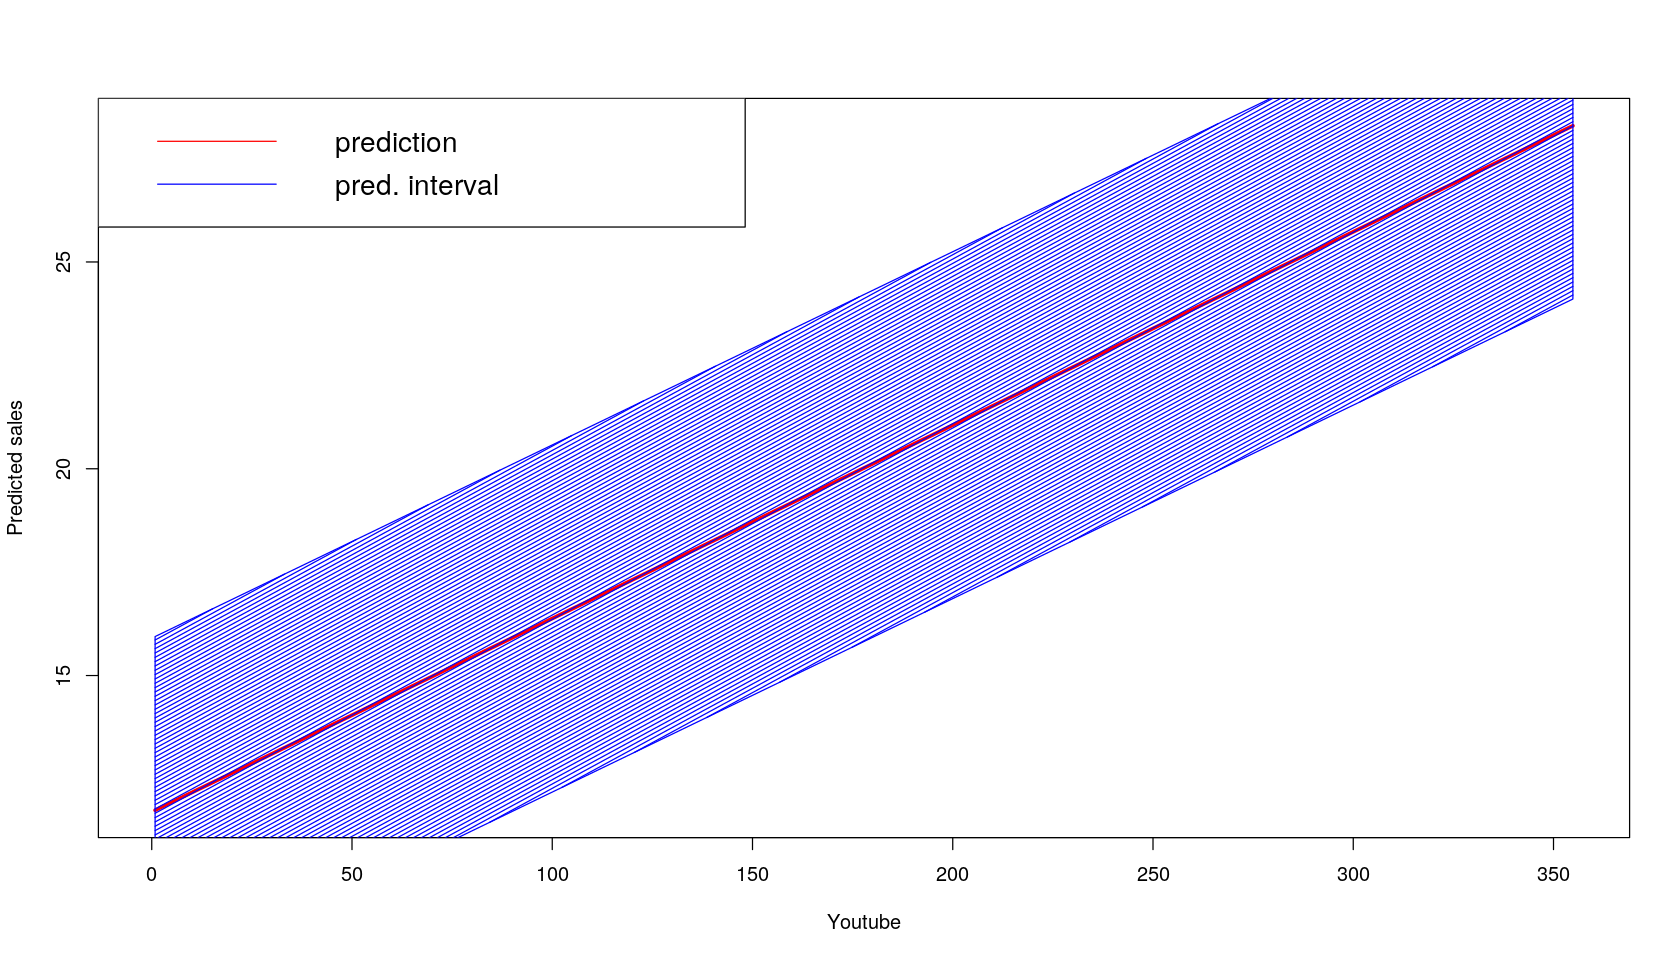

In [55]:
best_mape_model = lm(formula = sales ~ ., data = train)

facebook_ = marketing[1, 2]
newspaper_ = marketing[1, 3]
youtube_ = seq(min(marketing$youtube), max(marketing$youtube), 1)
yt_length = length(youtube_)
X = data.frame(matrix(c(
    youtube_,
    rep(facebook_, times = yt_length),
    rep(newspaper_, times = yt_length)
), ncol=3))
colnames(X) = c("youtube", "facebook", "newspaper")

predicted = as.data.frame(
    predict(best_mape_model, X, level = 0.95, interval = 'prediction')
)

plot(x = youtube_, y = predicted$fit, col = "red", type="l", xlab = "Youtube",
    ylab = "Predicted sales", lwd = 3)
polygon(
    c(min(youtube_), max(youtube_), max(youtube_), min(youtube_)),
    c(min(predicted$lwr), max(predicted$lwr), max(predicted$upr), min(predicted$upr)),
    col = "blue",
    density = 50
)

legend("topleft", legend = c("prediction", "pred. interval"),
       col = c("red", "blue"), lty=1, cex = 1.4)

**Вывод.** Как и должно быть, завивисимость прямо пропорциональная, коэффициент небольшой (угол наклона маленький), предсказательный интервал относительно большой: ширина по оси y почти 10 при значениях у 10 -- 30 у. е.